Generating data...


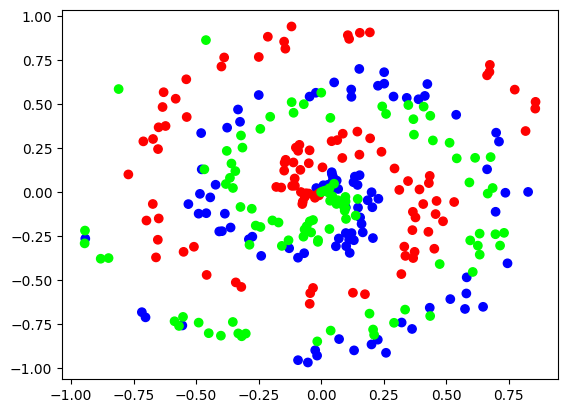

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def create_data(points, classes):
    X = np.zeros((points * classes, 2))        # feature matrix
    y = np.zeros(points * classes, dtype='uint8')  # labels

    for class_number in range(classes):
        ix = range(points * class_number, points * (class_number + 1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number * 4, (class_number + 1) * 4, points) + \
            np.random.randn(points) * 0.2  # theta with noise
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = class_number

    return X, y


# ✅ Example usage
print("Generating data...")
X, y = create_data(100, 3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()


In [6]:


np.random.seed(0)

X=[[1,2.3,3,-0.5],
   [2,-4,1.2,3],
   [3.4,-2.1,2.5,1]]


class  Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights =0.1* np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def  forward(self, inputs):
            self.output = np.dot(inputs  , self.weights) + self.biases



class  Activation_ReLU:
    def  forward(self , inputs):
        self.output = np.maximum(0,inputs)
    

layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

print("=====LAYER  1======")
layer1.forward(X)

print(layer1.output)

print("=====LAYER  2======")

layer2.forward(layer1.output)

print(layer2.output)
            
        

=====LAYER  1======
[[-0.02183932  0.62011416  0.30163087  0.2211981   0.45705721]
 [ 0.86110915  0.32273262  0.28606753  0.59798749  0.00630706]
 [ 0.87438448  0.44951117  0.53429953  0.84530517  0.57430027]]
=====LAYER  2======
[[ 0.19871222 -0.02830069]
 [-0.12330877 -0.0195397 ]
 [ 0.02879633  0.01464612]]
